# Thyroid Cancer Risk Prediction

### Load dataset 

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:/Users/wangz/Downloads/thyroid_cancer_risk_data.csv')

In [3]:
print("------ df.shape---------")
print(df.shape)

print("------ df.head---------")
print(df.head())

print("----- df.describe--------")
print(df.describe())

print("----- check for null values -----------")
print(df.isnull().sum())

------ df.shape---------
(212691, 17)
------ df.head---------
   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Drop irrelevant columns
df = df.drop(columns=['Patient_ID'])  # Not useful for ML

# Step 3: Standardize object (categorical) columns
# Convert to lowercase and strip spaces for consistency
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# Optional: Check for unique values per categorical column
# print({col: df[col].unique() for col in df.select_dtypes(include='object').columns})

# Step 4: Encode categorical features
# Label encode binary features or use one-hot encoding for others

# Binary Label Encoding
binary_cols = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['Country', 'Ethnicity', 'Thyroid_Cancer_Risk', 'Diagnosis'], drop_first=True)

# Step 5: Resulting cleaned dataframe
df.head()


,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_south korea,Country_uk,Country_usa,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_hispanic,Ethnicity_middle eastern,Thyroid_Cancer_Risk_low,Thyroid_Cancer_Risk_medium,Diagnosis_malignant
0,66,1,0,1,0,0,0,0,9.37,1.67,...,False,False,False,False,True,False,False,True,False,False
1,29,1,0,1,0,0,0,0,1.83,1.73,...,False,False,False,False,False,True,False,True,False,False
2,86,1,0,0,0,0,0,0,6.26,2.59,...,False,False,False,False,True,False,False,True,False,False
3,75,0,0,0,0,0,0,0,4.10,2.62,...,False,False,False,True,False,False,False,False,True,False
4,35,0,1,1,0,0,0,0,9.10,2.11,...,False,False,False,False,False,False,False,False,False,False


In [5]:
print(df.columns)

Index(['Age', 'Gender', 'Family_History', 'Radiation_Exposure',
       'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
       'T3_Level', 'T4_Level', 'Nodule_Size', 'Country_china',
       'Country_germany', 'Country_india', 'Country_japan', 'Country_nigeria',
       'Country_russia', 'Country_south korea', 'Country_uk', 'Country_usa',
       'Ethnicity_asian', 'Ethnicity_caucasian', 'Ethnicity_hispanic',
       'Ethnicity_middle eastern', 'Thyroid_Cancer_Risk_low',
       'Thyroid_Cancer_Risk_medium', 'Diagnosis_malignant'],
      dtype='object')


# Assign X and y

In [6]:
features = ['Age', 'Gender', 'Family_History', 'Radiation_Exposure',
       'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
       'T3_Level', 'T4_Level', 'Nodule_Size', 'Country_china',
       'Country_germany', 'Country_india', 'Country_japan', 'Country_nigeria',
       'Country_russia', 'Country_south korea', 'Country_uk', 'Country_usa',
       'Ethnicity_asian', 'Ethnicity_caucasian', 'Ethnicity_hispanic',
       'Ethnicity_middle eastern', 'Thyroid_Cancer_Risk_low',
       'Thyroid_Cancer_Risk_medium']
X = df[features]

y = df['Diagnosis_malignant']

# Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Normalize the features

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Perform PCA to reduce dimensionality

In [9]:
k = 3
my_pca = PCA(n_components = k)
X_train = my_pca.fit_transform(X_train_scaled)
X_test = my_pca.transform(X_test_scaled)

In [10]:
# Use only a portion
X_train = X_train[:10000]
y_train = y_train[:10000]

# Using Support Vector Machine model

In [11]:
svm = SVC(kernel='rbf', probability=True)

In [12]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [13]:
y_predict = svm.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_predict)

In [15]:
accuracy

0.8278449589077164

# Plot the ROC Curve

In [16]:
y_scores = svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.6980745926808014


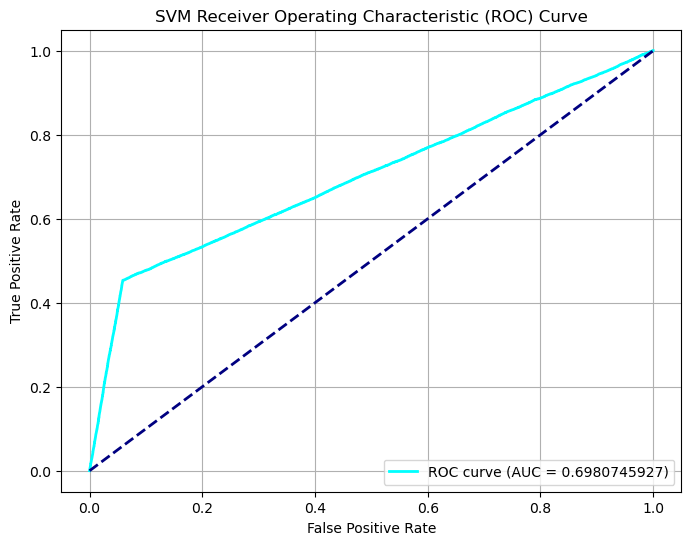

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='cyan', lw=2, label=f'ROC curve (AUC = {roc_auc:.10f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot confusion matrix

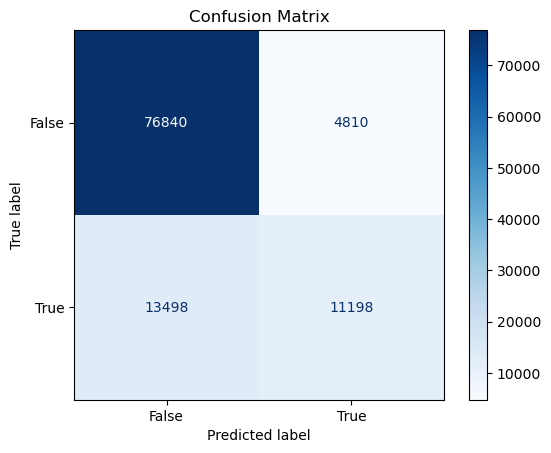

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict, labels=svm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Grid Search

In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 0.1, 'gamma': 1}
Best Cross-Validation Accuracy: 0.8318
Test Accuracy: 0.8278449589077164
